<h1>Rappels sur l’échantillonnage</h1>

<h2>**Définition**</h2> L’échantillonnage consiste à prélever un échantillon du signal à des intervalles réguliers. Ces intervalles peuvent être des intervalles de temps (si on travaille sur un signal temporel) ou des intervalles d’espace (si on travaille sur une image par exemple).

<h2>**Formalisme temporel**</h2> En travaillant sur un signal temporel (1D), l’échantillonnage consiste par un peigne de dirac
$\Pi_{T(t)} = \sum_{i=-\infty}^{\infty} \delta(t - nT)$. Un signal échantillonné à la période $T_e$ (ou de fréquence d’échantillonnage $T_e$) s’écrit alors :

$$
\begin{aligned}
x_e (t) = x(t)\Pi_{T_e(t)}
\end{aligned}
$$

                              
<h2>**Formalisme fréquentiel**</h2> A partir de cette expression temporelle, l’expression fréquentielle en découle: 

$$
\begin{aligned}
\begin{split}
X_e(f) & = X(f)* \hat{\Pi}_{T_e(t)} \\
   & = \int_{-\infty}^\infty  X(f - f')\frac{1}{T_e} \sum_{i=-\infty}^{\infty} \delta(f' - nF_{e}) \mathrm{d}f' \\
   & = F_{e}\sum_{i=-\infty}^{\infty} X(f - nF_{e}))
\end{split}
\end{aligned}
$$


Le spectre du signal échantilloné est donc une périodisation du spectre du signal analogique de période $F_e$.

### Echantillonnage 1D - suréchantillonnage - souséchantillonnage

In [1]:
import numpy as np
import matplotlib.pyplot as plt
'''Notes sur huit octaves'''
base_notes = [4186.24/2**7,4435.2/2**7,4698.88/2**7,4977.92/2**7,5274.24/2**7,5587.84/2**7,5920/2**7,6272/2**7,6645.12/2**7,7040/2**7,7458.56/2**7,7902.08/2**7]
frnotes = list()
frnotes.append(np.array(base_notes))

In [2]:
for i in range(1,8):
    frnotes.append(np.dot(frnotes[i-1],2))

In [3]:
Do=1; Dod = 2; Re = 3; Red = 4; Mi = 5; Fa = 6; Fad = 7; Sol = 8; Sold= 9; La = 10; Lad = 11; Si = 12;

In [4]:
'''Generate chirp from the Do4 to Do5 (10 seconds)'''
Fs = int(2000)
tmax = float(10);
t = np.arange(0, tmax, 1/Fs);
f = np.arange(frnotes[3][0], frnotes[4][0], (frnotes[4][0]-frnotes[3][0])/Fs/tmax);


In [5]:
import scipy.io.wavfile
chirp = np.sin(2*np.pi*t*f)
scipy.io.wavfile.write('chirp1.wav', Fs, chirp)
#//use the native OS player

In [6]:
'''Downsample by 2 : new sampling frequency is Fs2 = Fs/2'''
Fs2=Fs/2;
chirp_downsampled=chirp[::2];
scipy.io.wavfile.write('chirp_down.wav', Fs, chirp_downsampled)
# use the native OS player


Dans la première partie, on génère simplement le chirp. Dans la deuxième partie, on le sous-
échantillonne par deux. Vous devez faire le graphe du spectre du signal en fonction du temps
dans les deux cas (mettre le temps en abscisse et la fréquence en ordonnée, comme dans le cas du spectrogramme).
Donnez la justification théorique précise (entre autres avec les documents joints sur Jalon).

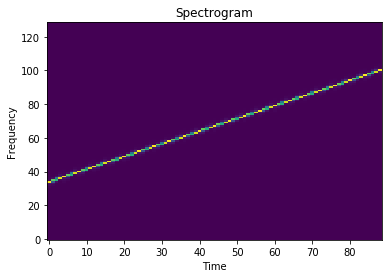

In [20]:
from scipy import signal
freqs, times, spectrogram = signal.spectrogram(chirp)

plt.figure(1)
plt.imshow(spectrogram, aspect='auto', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.show()

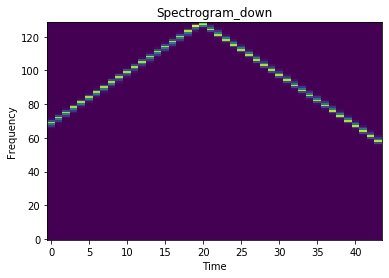

In [21]:
freqs2, times2, spectrogram2 = signal.spectrogram(chirp_downsampled)

plt.figure(2)
plt.imshow(spectrogram2, aspect='auto', origin='lower')
plt.title('Spectrogram_down')
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.show()

Dans un deuxième temps, on s’intéresse à deux sons, un “La” riche (présent sur 4 octaves) et un “Do” riche également. Ces sons sont générés avec une fréquence d’échantillonnage indiquées dans les figures jointes. On leur fait subir un changement de fréquence d’échantillonnage donné dans les figures également, sous l’appellation Axxx et Bxxx. On vous demande d’indiquer l’opération qui a été effectuée ainsi que d’indiquer en quoi le son A et sa version modifiée sont particulières.
Qu’a t’on choisi “subtilement” pour arriver à ce résultat ?

<img src="fig1.png" title="fig1" style="width: 700px;" />
<img src="fig2.png" title="fig2" style="width: 700px;" />
<img src="fig3.png" title="fig3" style="width: 700px;" />
<img src="fig4.png" title="fig4" style="width: 700px;" />

### Changement de cadence
Les densités spectrales de puissance dans la figure A et B ont ete genere a partir de le meme signal avec frequence d'échantillonnage Fs = 75kHz, apres il a ete souséchantillonne à 37.5 kHz et suréchantillonne at 150 kHz.



<img src="down1.gif" title="fig A" />

<img src="down2.gif" title="fig B" />

Quelle est la différence entre les deux figures? Indiquez celle qui vous paraît la plus “naturelle”.
Expliquez également les différences d’amplitude des densités spectrales de puissance (avec des
arguments solides).

<h2>1.4 Séance 2 : Echantillonnage en 2D</h2>